# OOI Lab Manual - Lab 2 - Data Skills

This notebook demonstrates how to access and process the dataset used in *Lab 2 Data Skills* of the [2021 OOI Lab Manual](https://datalab.marine.rutgers.edu/ooi-lab-exercises/).

This notebook was adapted from an earlier [Air/Sea Temperature](https://github.com/ooi-data-lab/blog-notebooks/blob/master/201901/Air%20and%20Sea%20Temps.ipynb) comparison example.

By Sage Lichtenwalner, March 6, 2020, Revised June 9, 2021

In [1]:
# Notebook Setup
import xarray as xr
import matplotlib.pyplot as plt
# import pandas as pd
import numpy as np

# Setup default plot styles
import seaborn as sns
sns.set()

# Supress open_mfdataset warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install git+https://github.com/seagrinch/ooilab.git
import ooilab
ooilab.API_USERNAME = ''
ooilab.API_TOKEN = ''

## Request Data from OOI Net
For this activity, let's grab data from CP04OSSM-SBD11-06-METBKA000.


In [3]:
# ooilab.request_data('CP04OSSM-SBD11-06-METBKA000','telemetered','metbk_a_dcl_instrument',
#              '2018-01-01T00:00:00.000Z','2019-01-01T00:00:00.000Z')

## Load the Dataset

In [4]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20210624T212037376Z-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

In [5]:
flist = ooilab.get_filelist(url)

# Open the dataset using xarray - THIS IS NOT WORKING
# ds = xr.open_mfdataset(flist).swap_dims({'obs': 'time'}).sortby('time')

# Alternate approach - Open files individually and merge
datasets = []
for f in flist:
  ds0 = xr.open_dataset(f).swap_dims({'obs': 'time'})
  ds0 = ds0[['air_temperature','sea_surface_temperature','met_salsurf']]
  datasets.append(ds0)

ds = xr.merge(datasets)

In [6]:
# Pull the source attribute to use as a plot title
source = ds.source
source

'CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument'

## Raw, Hourly, Daily and Monthly Averages

In [7]:
# Subset and average
ds = ds[['air_temperature','sea_surface_temperature','met_salsurf']]
ds_hourly = ds.resample(time='1H').mean()
ds_daily = ds.resample(time='1D').mean()
ds_monthly = ds.resample(time='1MS').mean()

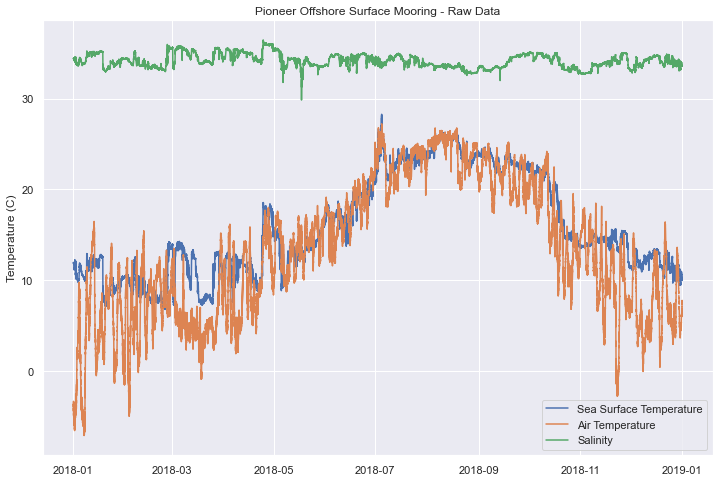

In [8]:
# Raw Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds['time'],ds['air_temperature'], label='Air Temperature')
plt.plot(ds['time'],ds['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Raw Data')
plt.legend();
plt.savefig('CP04_raw.png')

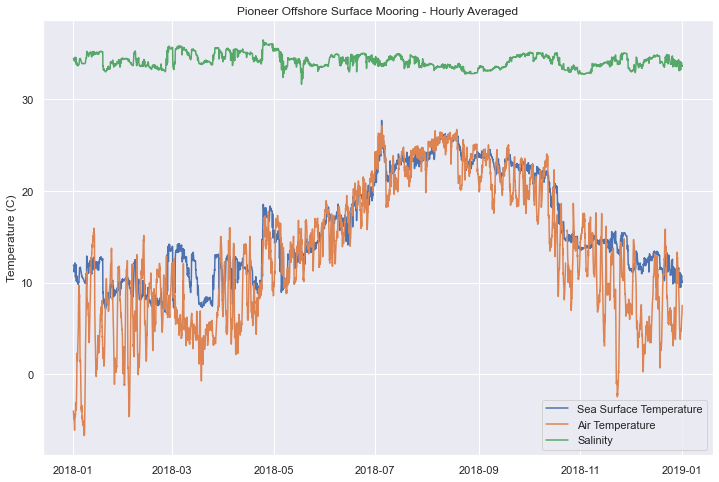

In [9]:
# Hourly Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_hourly['time'],ds_hourly['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_hourly['time'],ds_hourly['air_temperature'], label='Air Temperature')
plt.plot(ds_hourly['time'],ds_hourly['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Hourly Averaged')
plt.legend();
plt.savefig('CP04_hourly.png')

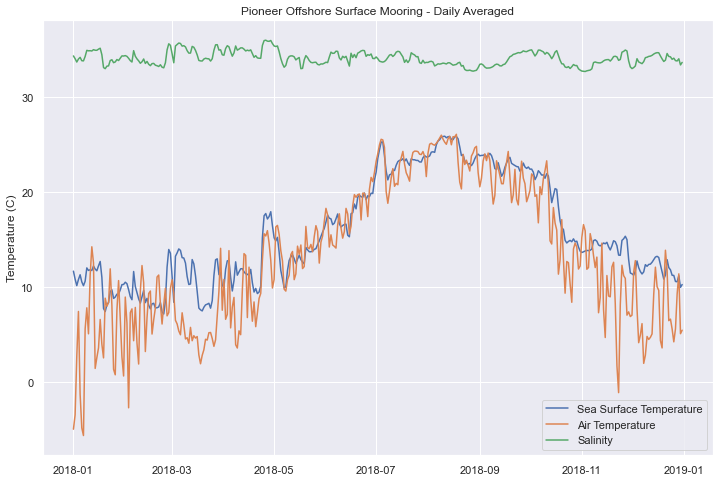

In [10]:
# Daily Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_daily['time'],ds_daily['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_daily['time'],ds_daily['air_temperature'], label='Air Temperature')
plt.plot(ds_daily['time'],ds_daily['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Daily Averaged')
plt.legend();
plt.savefig('CP04_daily.png')

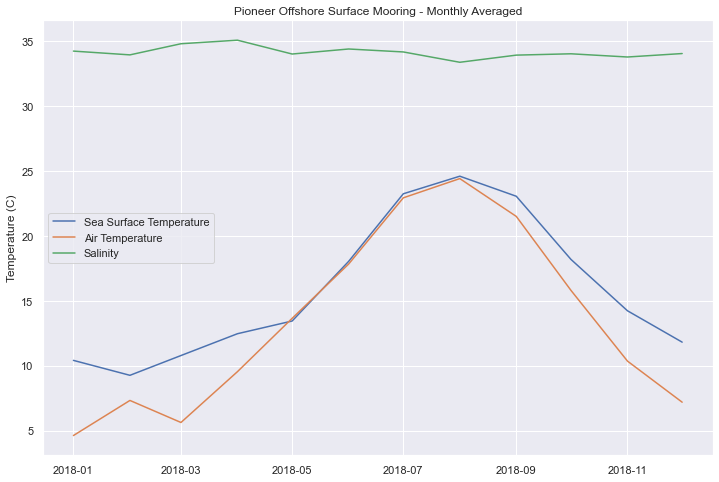

In [11]:
# Monthly Data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds_monthly['time'],ds_monthly['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds_monthly['time'],ds_monthly['air_temperature'], label='Air Temperature')
plt.plot(ds_monthly['time'],ds_monthly['met_salsurf'], label='Salinity')
plt.ylabel('Temperature (C)')
plt.title('Pioneer Offshore Surface Mooring - Monthly Averaged')
plt.legend();
plt.savefig('CP04_monthly.png')

## Export

In [12]:
ds.to_dataframe().to_csv('CP04OSSM_MET_2019_raw.csv')
ds_hourly.to_dataframe().to_csv('CP04OSSM_MET_2019_hourly.csv')
ds_daily.to_dataframe().to_csv('CP04OSSM_MET_2019_daily.csv')
ds_monthly.to_dataframe().to_csv('CP04OSSM_MET_2019_monthly.csv')